Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Axel Schaffland, Ulf Krumnack

# Exercise Sheet 04: Clustering

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, May 18, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

In the following tasks we will be relying on numpy. Using the following import we expect it to be in global scope as `np`. Therefore we can, after executing the following cell, use stuff like `np.array` and `np.sqrt`. Check out the [NumPy Reference](http://docs.scipy.org/doc/numpy/reference/index.html) and especially search it using e.g. [Google Site Search](https://www.google.de/search?q=array+site%3Adocs.scipy.org%2Fdoc%2Fnumpy)! You can also try `np.lookfor('keyword search docstrings')` to get help.

In [1]:
import numpy as np
np.lookfor('get array diagonal')

# Try other queries here
# YOUR CODE HERE

Search results for 'get array diagonal'
---------------------------------------
numpy.fill_diagonal
    Fill the main diagonal of the given array of any dimensionality.
numpy.mask_indices
    Return the indices to access (n, n) arrays, given a masking function.
numpy.random.Generator.multivariate_normal
    Draw random samples from a multivariate normal distribution.
numpy.random.RandomState.multivariate_normal
    Draw random samples from a multivariate normal distribution.


## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

YOUR ANSWER HERE

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

YOUR ANSWER HERE

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

YOUR ANSWER HERE

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [2]:
# YOUR CODE HERE

# Clustering

## Assignment 1: Distance Measures for Clusters [5 Points]

### a) Point and cluster distances

Explain the difference of point and cluster distances and their relation to each other. Give examples.

### unsicher:

There are not many? possibilities, to compute the distance between two points (e.g. euclidean distance), but for clusters you can choose a as a base for your calculation, between min and max values, the mean or the centre of the cluster (e.g. Chebyshev distance, Manhattan distance, Mahalanobis distance), so you can use the distance between points, to compute the distance between clusturs, but you have to decide which points/ how to weight them. 

### b) Mean and centroid distance

* Describe how the cluster metrics *mean distance* and *centroid distance* work.
* What formal requirements do they have?
* What is their computational complexity? 
* Give a numerical example of clusters (with cluster size at least 2), where they lead to (a) the same result and (b) different results.

mean distance:
- take the mean of all datapoints of Cluster 1,
- take the mean of all datapoints of Cluster 2,
-> comute distance
- sum of distance of x and y of each datapoints, diveded by # of xs * # of ys
centroid distance:
- distance between average of x, and average of y

Use Euclidean distance:

a)
- (0,2) (0,0)
- (0,4) (0,6)

centroid distance: cent1 : (0,1) cent2: (0,5) dist: 4 

mean distance: (2 + 4 + 4 + 6)/4 = 4

b) 
- (0,2) (0,0)
- (2,2) (2,0)

centroid distance: cent1 : (0,1) cent2: (2,1) dist: d((0,1), (2,1)) 

mean distance: (2 + 2 + \sqrt(8) + \sqrt(8))/4 

centroid distance:

In [3]:
2

2

mean distance:

In [4]:
(2 + 2 + (8)**(1/2) + (8)**(1/2))/4

2.414213562373095

### c) Implemention of  mean and centroid distance

Now implement the $d_{mean}$ and $d_{centroid}$ distance from the lecture. Each function expects two clusters each represented by a 2-dimensional numpy array, where the number of columns $n$ reflects the dimensionality of the data space and has to agree for both clusters, while the number of rows $mx$ and $my$ can vary from cluster to cluster. The return value is the respective distance.  Use the Euclidean distance as underlying metric.

Hint: you may consider using the function `scipy.spatial.distance.cdist`. Consult the documentation to find out how to use it.

In [5]:
from scipy.spatial.distance import cdist
import numpy as np

def d_mean(cluster1, cluster2):
    """
    Mean distance between points of two clusters.
   
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The mean distance between the points in the two clusters.
    """
    #print("cluster1: ", cluster1)
    #print("cluster2: ", cluster2)
    dist_mat = cdist(cluster1, cluster2)
    #print("dist_mat ",'\n', dist_mat )
    return dist_mat.sum() / (dist_mat.shape[0] * dist_mat.shape[1])
x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21], [5,45,1], [1,12,7]])

epsilon = 1e-3
d_mean(x, y)
assert abs(d_mean(x, y) - 22.297) < epsilon, "Result is not correct: {}".format(d_mean(x, y))
assert d_mean(x, y) == d_mean(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_mean(x, y), d_mean(y, x))

In [6]:
def d_centroid(cluster1, cluster2):
    """
    Calculate the distance between the centroids of two clusters.
    
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The distance between the centroids of two clusters.
    """
    #print(cluster1.shape)
    #* 2 because every dist is computed twice
    #c1 = cdist(cluster1, cluster1).sum() / (cluster1.shape[0] * 2) 
    #c2 = cdist(cluster2, cluster2).sum()  / (cluster2.shape[0] * 2) 
    c1 = cluster1.sum(axis = 0) / (cluster1.shape[0])
    c2 = cluster2.sum(axis = 0) / (cluster2.shape[0])
    
    
    out = cdist(np.expand_dims(c1, axis=0), np.expand_dims(c2, axis=0))
    #print(out)
    return out
    


x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21]])
z = np.array([[-2,0], [-1,100]])
w = np.array([[2,0], [1,100], [1,-100], [1,-20]])

epsilon = 1e-3
assert abs(d_centroid(x, y) - 20.785) < epsilon, "Result is not correct: {}".format(d_centroid(x, y))
assert abs(d_centroid(z, w) - 55.069) < epsilon, "Result is not correct: {}".format(d_centroid(z, w))
assert d_centroid(x, y) == d_centroid(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_centroid(x, y), d_centroid(y, x)) 

 ## Assignment 2: Hierarchical Clustering [6 Points]
 
 Consider the following matrix of distances
 
|       |  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |  2  |  6  |  10 |  9  |
| **b** |  2  |  0  |  5  |  9  |  8  |
| **c** |  6  |  5  |  0  |  4  |  5  |
| **d** |  10 |  9  |  4  |  0  |  3  |
| **e** |  9  |  8  |  5  |  3  |  0  |
 

### a) Perform agglomerative clustering

Do *agglomerative* average linkage clustering by hand (i.e. employing the *mean* cluster distance). Analyze how many alternatives you have to consider at each step.

Start: 5 clusters
merge a,b because they have the smallest distance.
Cluster a,b mean: 

total possibilities: 10

|       |  a,b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|
| **a,b** |  0  |  5.5  |  9.5|  8.5  |
| **c** |  5.5  |  0  |  4  |  5  |
| **d** |  9.5 |  4  |  0  |  3  |
| **e** |  8.5  |  5  |  3  |  0  |
 

n = 4
smalles distance between e and d -> merge them

total possibilities: 6

|       |  a,b  |  c  |  e,d  |
|-------|-----|-----|-----|
| **a,b** |  0  |  5.5 |   9  |
| **c** |  5.5  |  0  |  4.5  |
| **e,d** |  9  |  4.5  |  0  |

now n = 3


smalles distance between e,d and c -> merge them

How to weight ? just take sum of last dist mat?

total possibilities: 3

6+5+10+9+9+8 = 47

47 / 6 = 7.83

|       |  a,b  |  e,d,c  |
|-------|-----|-----|
| **a,b** |  0  |  7.83  |
| **e,d,c** |  7.83  |  0  |

total possibilities: 1

now n = 2 -> Done


### b) Perform divisive clustering

Now try to do divisive average linkage clustering. Again, analyze how many splits are possible in the first step? Think of a strategy that allows to reduce this number and use this in your computation.

YOUR ANSWER HERE

### c) Linkage criteria

In the following you find implementations for single- and complete-linkage clustering. Take a look at the code  and answer the question posted below. You may of course change parameters and try it out on different datasets (`points.txt` & `clusterData.txt` are provided).

Note that for performance reasons the code differs from the lecture's pseudocode (ML-05 Slide 8), but in general it does the same.

In [7]:
from scipy.spatial.distance import cdist

def linkage(data, k=5, complete=False):
    """
    Runs single or complete linkage clustering.
    
    Args:
        data (ndarray): Data points to be clustered in an array with shape (num_points, 2).
        k (int): Number of clusters.
        complete (bool): Whether to run complete linkage clustering.
        
    Returns:
        ndarray: The cluster labels for each data point. Shape is (num_points).
    """
    # Initially all points are their own cluster.
    labels = np.arange(len(data))

    # Calculate distance between all points.
    # Also removing half of the matrix because 
    # its symmetrical along the diagonal.
    dst = np.tril(cdist(data, data))

    while len(set(labels)) > k:
        # Get the lowest distance of two points which
        # do not have the same label.
        r, c = np.where(dst == np.min(dst[dst > 0]))
        
        # Ignore the case when there are multiple with
        # equally smallest distance.
        r = r[0]
        c = c[0]

        # The two points are now in the same cluster,
        # so they have a distance of 0 now.
        dst[r, c] = 0

        # Make the two clusters have the same label.
        labels[labels == labels[r]] = labels[c]

        # Check if we want to do complete linkage clustering.
        if complete:
            # Update the distances of the points which are not in the same cluster.
            for i in np.nonzero(dst[r, :] > 0)[0]:
                dst[r, i] = np.max(cdist(data[i, None], data[labels == labels[r], :]))

            # The distances to c are now the same as to r, so we can just
            # set them to zero - would be duplicates otherwise.
            dst[:, c] = 0

    return labels

Single Linkage Clustering:
Label:   10,  Occurence:   71
Label:   48,  Occurence:    1
Label:   62,  Occurence:   75
Label:  107,  Occurence:   27
Label:  118,  Occurence:    1
Complete Linkage Clustering:
Label:   10,  Occurence:   42
Label:   15,  Occurence:   40
Label:  104,  Occurence:   29
Label:  118,  Occurence:   37
Label:  136,  Occurence:   27


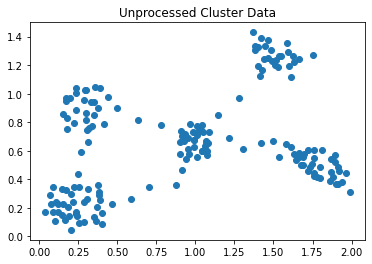

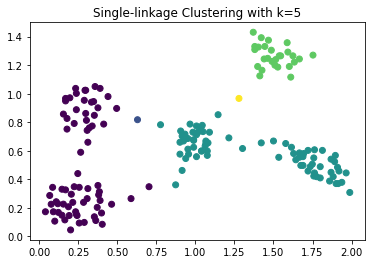

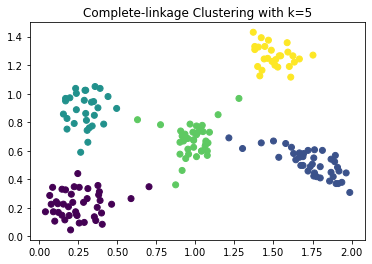

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Read the data.
data = np.loadtxt('points.txt')

# Show unprocessed data set.
fig_cluster = plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.title('Unprocessed Cluster Data')
fig_cluster.canvas.draw()

# Apply Single Linkage Clustering
labels = linkage(data, k=5, complete=False)
unique, inverse, counts = np.unique(labels, return_inverse=True, return_counts=True)
print("Single Linkage Clustering:")
# Print the unqiue labels and their occurence
for u, c in zip(unique, counts):
    print("Label: {:4},  Occurence: {:4}".format(u, c))    
# Replace labels by continuous values starting from 1 for discernible colors in plot
labels = np.arange(1,unique.size+1)[inverse]
fig_single = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Single-linkage Clustering with k=5')
fig_single.canvas.draw()


# Apply Complete Linkage Clustering
labels = linkage(data, k=5, complete=True)
unique, inverse, counts = np.unique(labels, return_inverse=True, return_counts=True)
print("Complete Linkage Clustering:")
for u, c in zip(unique, counts):
    print("Label: {:4},  Occurence: {:4}".format(u, c))    
labels = np.arange(1,unique.size+1)[inverse]
fig_complete = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Complete-linkage Clustering with k=5')
fig_complete.canvas.draw()



# Test different parameters above
# YOUR CODE HERE

What is the difference between single- and complete-linkage clustering and which is the better solution given the dataset?

YOUR ANSWER HERE

## Assignment 3: k-means Clustering [9 Points]

### a) Implement k-means clustering. Plot the results for $k = 7$ and $k = 3$ in colorful scatter plots.

How could one handle situations when one or more clusters end up containing 0 elements? Handle these situtation in your code.

In [9]:
import random

In [46]:
def kmeans(data, k=3):
    """
    Applies kmeans clustering to the data using k initial clusters.
    data is expected to be a numpy array of size n*2, 
    n being the amount of observations in the data. This function returns
    the centroids and the labels for the clusters data (1,1,3,5,5,5,...)
    """
    
    t = 0
    min_bound = np.min(data, axis = 0)
    max_bound = np.max(data, axis = 0)
    #print("min_bound: ", min_bound)
    #print("max_bound: ", max_bound)
    
    #initialize 
    reference_vectors = np.empty((k,2))
    #clusturs = []
    for v in range(k):
        reference_vectors[v][0] = random.uniform(min_bound[0], max_bound[0])
        reference_vectors[v][1] = random.uniform(min_bound[1], max_bound[1])
        #clusturs.append([])
       
    
    done = False
    old_labels = 0
    while t < 100 and not done:
        t += 1
        
        #initialize empty clusters
        clusturs = []
        for v in range(k):
            clusturs.append([])
        
        #compute distance for all data points to reference_vectors
        distance_mat = np.empty((reference_vectors.shape[0], data.shape[0]))
        for i in range(data.shape[0]):
            distance_mat[:, i] = np.linalg.norm(reference_vectors - data[i], axis=-1)
            
        # get index of minimum
        best_cluster = np.argmin(distance_mat, axis=0)
        

        #assign each data point to the right cluster
        for i in range(k):
            clusturs[i] = data[best_cluster == i]
        
        
        #calculate new reference_vectors:
        for i in range(k):
            #handle empty clusters, move reference_vectors randomly
            if len(clusturs[i]) == 0:
                reference_vectors[v][0] = random.uniform(min_bound[0], max_bound[0])
                reference_vectors[v][1] = random.uniform(min_bound[1], max_bound[1])
            else:
                reference_vectors[i] = np.mean(clusturs[i], axis=0)
        
        # did someting change?
        if all(old_labels == best_cluster):
            done = True
        else:
            old_labels = best_cluster
            
    
    return old_labels, reference_vectors

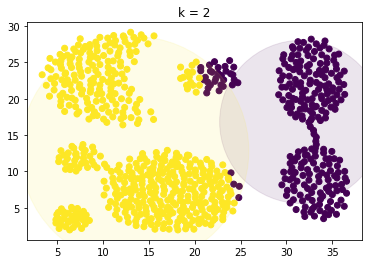

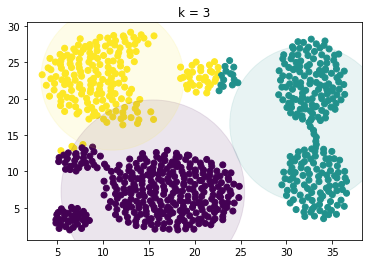

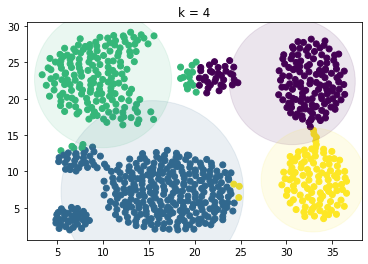

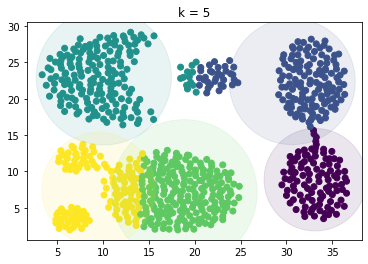

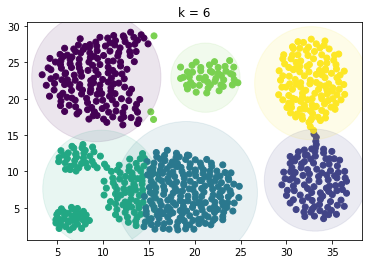

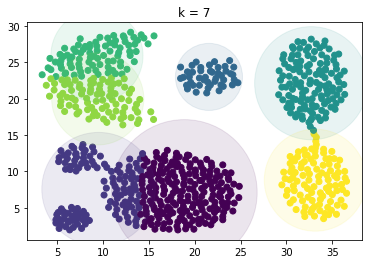

In [49]:
%matplotlib inline

data = np.loadtxt('clusterData.txt')


# Test different ks here
# YOUR CODE HERE
for k in range(2,8):
#for k in [7]*5:    
    labels, centroids = kmeans(data, k)

    kmeans_fig = plt.figure('k-means with k={}'.format(k))
    plt.scatter(data[:,0], data[:,1], c=labels)
    plt.scatter(centroids[:,0], centroids[:,1], 
                c=list(set(labels)), alpha=.1, marker='o',
                s=np.array([len(labels[labels==label]) for label in set(labels)])*100)
    plt.title('k = '+str(k))
    kmeans_fig.canvas.draw()

plt.show()
    
    

### b) Why might the clustering for k=7 not look optimal? 

This is because the size and variance of the data cluster varies. The best solution would be if a center of a small cluster, like in the lower left corner, would allow only a small variance. But it counts even (12/7) to this cluster, because the distance to this small cluster is closer than to the big cluster on its right side.